In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP

In [2]:
include("../src/likelihood.jl")
include("../src/utill.jl")

corner_plots (generic function with 1 method)

In [3]:
conv_mat = load("../data/experiment/dataset_2/m2/conv_matrix.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_3"],
);


In [4]:
images = load("../data/experiment/dataset_2/m2/images.jld2");

event_number = 1

event = (
    cam_1 = images["cam_1"][event_number,:,:],
    cam_2 = images["cam_2"][event_number,:,:],
    cam_3 = images["cam_3"][event_number,:,:],
    cam_4 = images["cam_4"][event_number,:,:],
    population = images["charge"][event_number,:][1],
)

param = (
        tr_size = [0.15, 0.15],
        ang_spr = [4.0, 4.0],
        s_waist = [2.9,],
        μ_x = [35,35,20,35], # alignment X
        μ_y = [35,35,20,35], # alignment Y
        σ_x = [0,0,0,0], # resolution X
        σ_y = [0,0,0,0], # resolution Y
        δ_x = [0.0271,0.0216,0.114,3*0.0303], # pixel size X
        δ_y = [0.0305,0.0234,0.125,3*0.0298], # pixel size Y
        int_coeff  = [35147.44, 50235.06, 10096.64, 33406.9], # light intensity coefficient
        s_cam = [0.0, 1.478, 15.026, 23.1150], # camera position
    );


In [5]:
event.population

26.864200592041016

In [6]:
simulated_event = generate_event(param, event.population, conv_matrices)

(cam_1 = [249 63 … 6 2; 11 5 … 2 473; … ; 2 4 … 8 3; 5 1 … 18 4], cam_2 = [1 12 … 2 52; 0 402 … 5 4; … ; 1 3 … 1 6; 1 3 … 1 0], cam_3 = [153 3 … 133 2; 38 9 … 0 20; … ; 20 53 … 14 1; 2 9 … 1 170], cam_4 = [37 38 … 4 32; 3 0 … 80 192; … ; 18 2 … 44 0; 14 10 … 14 1], population = 26.864200592041016)

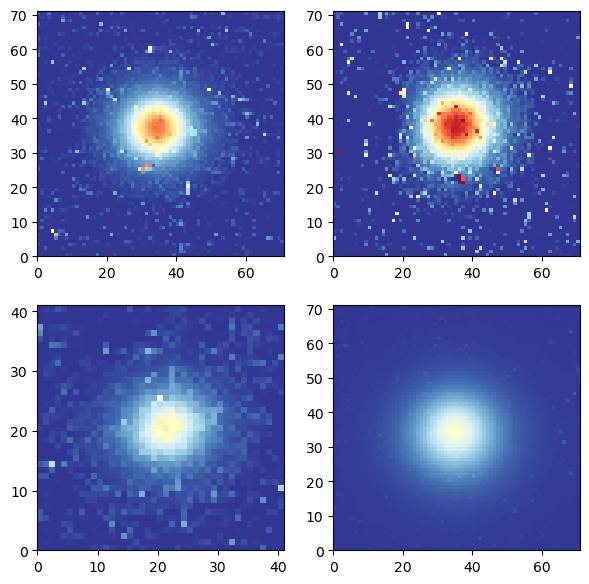

PyObject <matplotlib.collections.QuadMesh object at 0x7fefa5cd3c10>

In [7]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event[1], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event[2], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event[3], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event[4], vmin=0, vmax=2^12, cmap="RdYlBu_r")

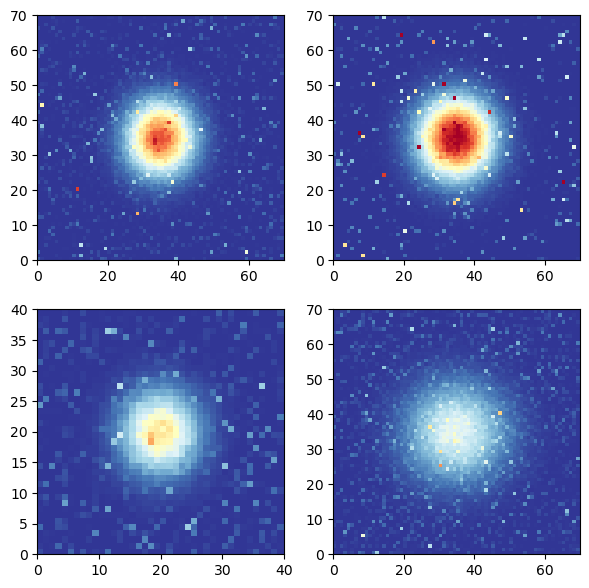

PyObject <matplotlib.collections.QuadMesh object at 0x7fefa6a61c10>

In [8]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(simulated_event[1], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[1,2].pcolormesh(simulated_event[2], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[2,1].pcolormesh(simulated_event[3], vmin=0, vmax=2^12, cmap="RdYlBu_r")
ax[2,2].pcolormesh(simulated_event[4], vmin=0, vmax=2^12, cmap="RdYlBu_r")

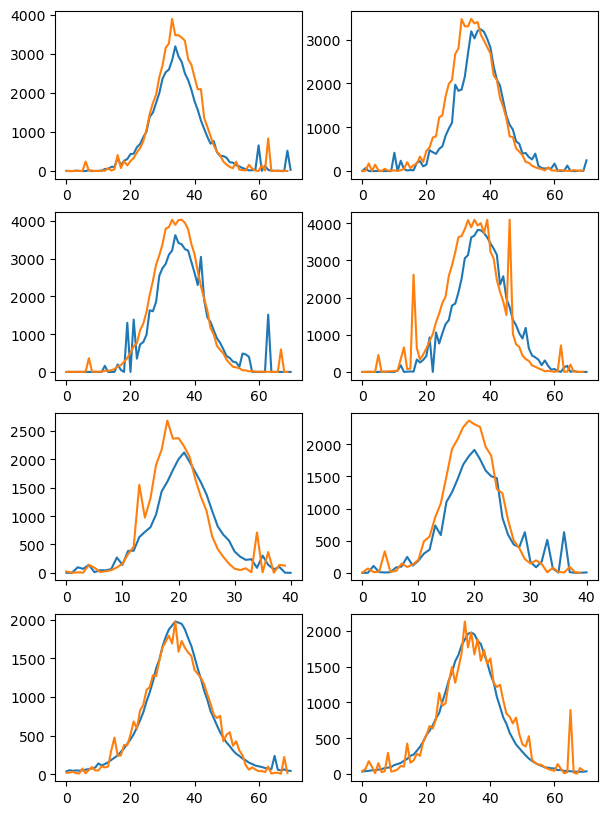

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fefa7022430>

In [9]:
fig, ax = plt.subplots(4,2, figsize=(7,10))

ax[1].plot(event[1][35,:])
ax[1].plot(simulated_event[1][35,:])

ax[2].plot(event[2][35,:])
ax[2].plot(simulated_event[2][35,:])

ax[3].plot(event[3][20,:])
ax[3].plot(simulated_event[3][20,:])

ax[4].plot(event[4][35,:])
ax[4].plot(simulated_event[4][35,:])

ax[5].plot(event[1][:,35])
ax[5].plot(simulated_event[1][:,35])

ax[6].plot(event[2][:,35])
ax[6].plot(simulated_event[2][:,35])

ax[7].plot(event[3][:,20])
ax[7].plot(simulated_event[3][:,20])

ax[8].plot(event[4][:,35])
ax[8].plot(simulated_event[4][:,35])